In [596]:
import pandas

In [597]:
clean_dataset = pandas.read_csv('df_banco_final.csv', sep=';')
clean_dataset.head()

default  telephone  foreign_worker  estado_civil  account_check_status_1  \
0        0          1               1             1                    True   
1        1          0               1             0                   False   
2        0          0               1             1                   False   
3        0          0               1             1                    True   
4        1          0               1             1                    True   

   account_check_status_2  account_check_status_3  account_check_status_4  \
0                   False                   False                   False   
1                    True                   False                   False   
2                   False                   False                    True   
3                   False                   False                   False   
4                   False                   False                   False   

   credit_history_1  credit_history_2  ...  rango_plazos_credito_1  \
0             False             False  ...                    True   
1             False             False  ...                   False   
2             False             False  ...                    True   
3             False             False  ...                   False   
4             False             False  ...                   False   

   foreign_worker  sexo  estado_civil  rango_valor_credito  \
0               1     0             1                    2   
1               1     1             0                    6   
2               1     0             1                    3   
3               1     0             1                    8   
4               1     0             1                    5   

   rango_plazos_credito  rango_edad  
0                     1           5  
1                     4           1  
2                     1           3  
3                     4           3  
4                     2           4

In [598]:
from sklearn.preprocessing import StandardScaler

In [599]:
#Estandariza la escala de la media y de la desviación estandar y se almacena la función en una variable
norm = StandardScaler()

In [600]:
# X es un DataFrame que contiene todas las columnas del DF excepto la columna 'default'.
x = clean_dataset.drop('default', axis=1)
# Y es una serie que contiene únicamente el valor default
y = clean_dataset['default']

#El método fit_transform se aplica a las características x para ajustar la estandarización y al mismo tiempo transformar las características
x_normalized = norm.fit_transform(x)
#Se almacena el resultado en nueva variable con una media de cero y desviación estandar de 1
x_normalized

array([[-1.06271653,  1.50687935, -2.01779722, ..., -0.62124939,
        -1.05547493,  2.80548   ],
       [-0.25059691, -0.33157912,  0.68482522, ...,  0.79816986,
         1.95811766, -0.85668504],
       [ 1.37364232,  1.50687935,  0.68482522, ..., -0.26639458,
        -1.05547493,  0.97439748],
       ...,
       [-1.06271653, -2.17003758,  0.68482522, ..., -0.62124939,
        -1.05547493, -0.85668504],
       [-0.25059691, -0.33157912,  0.68482522, ..., -0.26639458,
        -0.05094407, -0.85668504],
       [-1.06271653, -0.33157912,  0.68482522, ..., -0.62124939,
        -1.05547493, -0.85668504]])

In [601]:
from sklearn.model_selection import train_test_split

In [602]:
#x_normalized contiene el conjunto de caracteristicas, contra Y que es la variable objetiva 
#test_size=0.3 significa que el 30% de los datos se utilizarán como conjunto de prueba, y el 70% restante se utilizará como conjunto de entrenamiento.
x_train, x_test, y_train, y_test = train_test_split(x_normalized, y, test_size=0.3, random_state=12)

In [603]:
"""El resultado de train_test_split son cuatro conjuntos de datos:

X_train: Conjunto de características para entrenamiento.
X_test: Conjunto de características para pruebas.
y_train: Variable objetivo para entrenamiento.
y_test: Variable objetivo para pruebas."""

'El resultado de train_test_split son cuatro conjuntos de datos:\n\nX_train: Conjunto de características para entrenamiento.\nX_test: Conjunto de características para pruebas.\ny_train: Variable objetivo para entrenamiento.\ny_test: Variable objetivo para pruebas.'

In [604]:
#Importamos el modulo clasificador
from sklearn.ensemble import RandomForestClassifier

In [605]:
#Aplica el clasificador de bosque aleatorio 
model = RandomForestClassifier(random_state=12, max_depth = None, n_estimators = 50)
#Entrena las variables objetivas del entrenamiento
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=12)

In [606]:
#Aplicamos el modelo RandomForestClassifier al conjunto de datos de prueba y lo almacenamos en la variable con el modelo entrenado para realizar predicciones en las características del conjunto de datos de prueba
predictions = model.predict(x_test)

In [607]:
#Importamos las métricas relacionadas con la evaluación del rendimiento del modelo de clasificación 
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [608]:
"""#La variable confmatrix contendrá la matriz de confusión calculada al comparar (y_test) con las predicciones del modelo (predictions).
confmatrix = confusion_matrix(y_test, predictions)
confmatrix

confmatrix[0,0]: Verdaderos negativos (TN)
confmatrix[0,1]: Falsos positivos (FP)
confmatrix[1,0]: Falsos negativos (FN)
confmatrix[1,1]: Verdaderos positivos (TP)

#fig, ax = plt.subplots(figsize=(8, 8))
visual_confmatrix = ConfusionMatrixDisplay(confmatrix)

visual_confmatrix.plot(cmap='PuBu') #ax=ax)

Añade anotaciones de los valores en la matriz de confusión
for i in range(confmatrix.shape[0]):
    for j in range(confmatrix.shape[1]):
        ax.text(j, i, f"{confmatrix[i, j]:,}\n{['Verdaderos Negativos', 'Falsos Positivos', 'Falsos Negativos', 'Verdaderos Positivos'][i + j * 2]}", 
                ha='center', va='center', color='red' if i != j else 'white')
              

plt.show()  """

'#La variable confmatrix contendrá la matriz de confusión calculada al comparar (y_test) con las predicciones del modelo (predictions).\nconfmatrix = confusion_matrix(y_test, predictions)\nconfmatrix\n\nconfmatrix[0,0]: Verdaderos negativos (TN)\nconfmatrix[0,1]: Falsos positivos (FP)\nconfmatrix[1,0]: Falsos negativos (FN)\nconfmatrix[1,1]: Verdaderos positivos (TP)\n\n#fig, ax = plt.subplots(figsize=(8, 8))\nvisual_confmatrix = ConfusionMatrixDisplay(confmatrix)\n\nvisual_confmatrix.plot(cmap=\'PuBu\') #ax=ax)\n\nAñade anotaciones de los valores en la matriz de confusión\nfor i in range(confmatrix.shape[0]):\n    for j in range(confmatrix.shape[1]):\n        ax.text(j, i, f"{confmatrix[i, j]:,}\n{[\'Verdaderos Negativos\', \'Falsos Positivos\', \'Falsos Negativos\', \'Verdaderos Positivos\'][i + j * 2]}", \n                ha=\'center\', va=\'center\', color=\'red\' if i != j else \'white\')\n              \n\nplt.show()  '

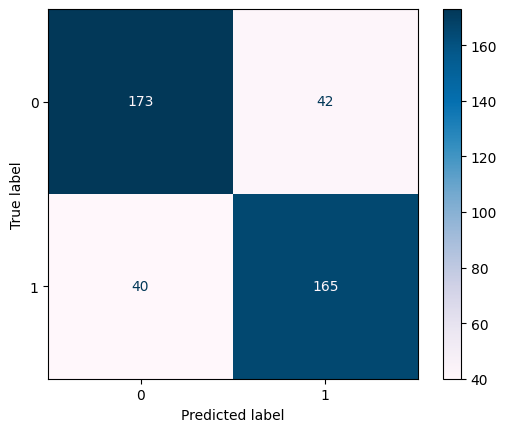

In [609]:
#La variable confmatrix contendrá la matriz de confusión calculada al comparar (y_test) con las predicciones del modelo (predictions).
confmatrix = confusion_matrix(y_test, predictions)
confmatrix

visual_confmatrix = ConfusionMatrixDisplay(confmatrix)

visual_confmatrix.plot(cmap='PuBu')

In [610]:
#calcula las métricas de evaluación del rendimiento de un modelo de clasificación
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
rocauc = roc_auc_score(y_test, predictions)

In [611]:
#Truenegatives representa la cantidad de verdaderos negativos (TN) en la matriz de confusión.
tn = confmatrix[0][0]
#FalsePositive representa la cantidad de falsos positivos (FP) en la matriz de confusión.
fp = confmatrix[0][1]
#specificity calcula el coeficiente especificidad
specificity = tn/(tn + fp)
specificity

0.8046511627906977

In [612]:
#Creamos un diccionario para almacenar las metricas de evaluación
model_scores = {
  'model': 'RandomForestClassifier',
  'accuracy': accuracy,
  'precision': precision,
  'recall': recall,
  'f1_score': f1,
  'roc_auc_score': rocauc,
  'specificity' : specificity
}
model_scores

{'model': 'RandomForestClassifier',
 'accuracy': 0.8047619047619048,
 'precision': 0.7971014492753623,
 'recall': 0.8048780487804879,
 'f1_score': 0.8009708737864077,
 'roc_auc_score': 0.8047646057855928,
 'specificity': 0.8046511627906977}

In [613]:
#Definimos una función para guardar el resultado
def save_scores(model_scores: dict):
  status = []
  #Utilizamos un try-except en caso de que el archivo no exista que cree uno
  try:
    #Si el archivo existe continúa por acá
    scores = pandas.read_csv('scores.csv', sep=';')
    status.append('El archivo existe')
    exist = model_scores['model'] in scores['model'].values
    #Validamos si el modelo ya existe en el archivo de scores
    if (exist):
      #Si el modelo ya existe reemplazamos sus valores
      status.append('El modelo existe')
      criteria = scores['model'] == model_scores['model']
      index = scores[criteria].index[0]
      scores.iloc[index] = model_scores
      status.append('Se reemplazaron los valores del modelo')
    else:
      #Si el modelo no existe lo agregamos
      status.append('El modelo no existe')
      df_model_scores = pandas.DataFrame(model_scores, index=[0])
      scores = pandas.concat([scores, df_model_scores], ignore_index=True)
      status.append('Se añadió modelo nuevo y sus valores')
  except:
    #Si no existe el archivo lo creamos y cargamos los scores del modelo
    status.append('El archivo no existe')
    scores = pandas.DataFrame(model_scores, index=[0])

  status.append('Se sobrescrive el archivo scores.csv con valores nuevos')
  scores.to_csv('scores.csv', sep=';', index=False)
  return status

In [614]:
save_scores(model_scores)

['El archivo existe',
 'El modelo existe',
 'Se reemplazaron los valores del modelo',
 'Se sobrescrive el archivo scores.csv con valores nuevos']

In [615]:
#Mejorando el modelo de predicción
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



# Dividir el conjunto de datos en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)

# Definir los parámetros que deseas ajustar
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'n_estimators': [10, 50, 100, 200]
}

# Inicializar el modelo RandomForestRegressor
model = RandomForestClassifier(random_state=12)

# Inicializar GridSearchCV con el modelo y los parámetros
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(x_train, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Hacer predicciones en los datos de prueba con el mejor modelo
y_pred = best_model.predict(x_test)

# Evaluar el rendimiento del modelo en los datos de prueba
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')
print(f'Best Parameters: {best_params}')


Mean Squared Error on Test Set: 0.18928571428571428
Best Parameters: {'max_depth': None, 'n_estimators': 50}
